<a href="https://colab.research.google.com/github/vmulmale/AI-Enabled-IT-Service-Ticketing-tool/blob/Develop_Vivek/Copy_of_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AI Enabled IT Ticketing Service Tool 

# 1. PROBLEM STATEMENT 

In any of the IT industry, incident management plays an important role in delivering quality and timely support to its customers across the globe.

The incidents are generally created by various stakeholders like end users, vendors, IT users, etc. They might not have right information as to which team the ticket should go to. Hence, to imporve and retain customer satisfaction, it is very important that the ticket is assigned to the right group of people for faster and approproiate resolution. In Many Organizations this is still a manual process. There re few problems with the manual process:
1. Manual assignment of incidents is time consuming
2. It requires human efforts
3. There may bemistakes due to human errors and resource consumption is carried out ineffectively because ofthe misaddressing
4. Manual assignment increases the response and resolution times which result in user satisfaction deterioration / poor customer service

L1 / L2 needs to spend time to review Standard Operating Procedures (SOPs) before assigning to Functional teams (Minimum 25–30% of incidents needs to be reviewed for SOPs before ticket assignment).  

15 mins are being spent for SOP review for each incident. Minimum of 1 FTE effort needed only for incident assignment to L3 teams.  

During the process of incident assignments by L1 / L2 teams to functional groups, there were multiple instances of incidents getting assigned to wrong functional groups.  

Around 25% of Incidents are wrongly assigned to functional teams. Additional effort needed for Functional teams to re-assign to right functional groups 

During this process, some of the incidents are in queue and not addressed timely resulting in poor customer service and loss of business.




# 2. OBJECTIVE

We are building an AI solution which will enable organizations to classify incidents to the right functional group by implementing the best suited machine learning model and leading to customer satisfaction. 

Guided by AI, organizations can reduce the resolution time and focus on more productive tasks. This will overcome and save time with below losses:

1. Time latency sue to review of SOPs before assigning to right functional group 
2. Incorrect assignments to functional groups
3. #ToDo ( Include figures for losses and revenue ) --> to be checked by Gloria 

# 3. SOLUTION

ToDo ( Add the different approches taken )

## 3.1 EDA

## 3.1.1 Install the required libraries

In [ ]:
pip install sweetviz

In [ ]:
!pip install pandas-profiling==2.7.1

In [ ]:
!pip install ftfy

In [ ]:
!pip install google_trans_new

### 3.1.2 Importing necessary libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv
from pandas_profiling import ProfileReport
from wordcloud import WordCloud, STOPWORDS 
import ftfy
from google_trans_new import google_translator
import pickle

%matplotlib inline


ModuleNotFoundError: ignored

## 3.1.2 Import the dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Fetch the data from input data stored in Goolge drive
incidents_data = pd.read_excel('/content/drive/MyDrive/AIML/projects/CAPSTONE_PROJECT/input_data.xlsx')

In [ ]:
# Check the first 5 rows of data
incidents_data.head()

## 3.1.3 Visualizing and analysing the data 

3.1.3.1 Report visualization using SweetViz

In [ ]:
incidents_report = sv.analyze(incidents_data)
#display the report
incidents_report.show_html('Incidents_sweetviz_report.html')
incidents_report.show_notebook()

3.1.3.2 Report visualization using Pandas Profiling

In [ ]:
incident_report = ProfileReport(incidents_data, html={'style': {'full_width' : True}})
incident_report.to_file(output_file='Incidents_pandas_profiling_report.html')
incident_report.to_notebook_iframe()

3.1.3.3 Observations from SweetViz and Pada Profiling reports above

From Above two reports we have below onservations: 
1. Shape of the data - { Rows : 8500, Columns : 4 }
2. Total features - 3
    
    2.1. Short Description - Text

    2.2. Description - Text

    2.3. Caller - Text
3. Target Column - 1
  
    3.1 Assignment Group - Categorical
4. There are 84 duplicate records in total. We see further below about specific columns and strtegy to handle duplicates.
5. We shall also check if we need to create new features as I think all the columns are important. May be we can also find some hidden patterns as below: 
          A. Common Issues -> user can be trained if possible 
          B. Common Caller -> May be user needs training or help with hardware or software
          C. #ToDo To find if issue is controllable or not --> Check if possible .
          D. To find if customer is happy with service or needs further imporvement and assistance

Now let's look at individual feature: 
1. **Short description** 
  
   A. Total values - 8492 ( > 99% )
   
   B. Missing values - 8 ( < 1% )

   C. Distinct values - 7481 (88%)

   D. Mostly occuring value - password reset ( 0.4% )
   
   E. We can also see the number of times each value is being repeated

   F. Max length of statement - 159

   G. It contains:
    
        Characters -> Lowercase Letter, Punctuation, 
        Uppercase Letter, Decimal Number, 
        Math Symbol, Math_Symbol, 
        Modifier Symbol, Other_Number, 
        Other_Symbol, Currency_Symbol

        Scripts -> Common(ASCII) and Latin

  H. With this we can say that we will also have to translate based on the scripts as part of data pre processing
2. **Description** 
  
   A. Total values - 8499 ( > 99% )
   
   B. Missing values - 1 ( < 1% )

   C. Distinct values - 7817 ( 92% )

   D. Mostly occuring value - it shows "the" ( 0.7% ) but we shall check this after removal of stop words. But we consider the next which is windows password reset ( 0.3% )

   E. We can also see the number of times each value is being repeated

   F. Max length of statement - 13001

   G. It contains:
    
        Characters -> Lowercase Letter, Punctuation, 
        Uppercase Letter, Decimal Number, 
        Math Symbol, Math_Symbol, 
        Modifier Symbol, Other_Number, 
        Other_Symbol, Currency_Symbol

        Scripts -> Common(ASCII) and Latin

  H. With this we can say that we will also have to translate based on the scripts as part of data pre processing 
3. **Caller** 
  
   A. Total values - 8500 ( 100% )
   
   B. Missing values - no missing value
 
   C. Distinct values - 2950 ( 35% )

   D. Mostly occuring value - bpctwhsn kzqsbmtp (10%)

   E. We can also see the number of times each value is being repeated

   F. Max length of statement - 30

   G. It contains:
    
        Characters -> Lowercase Letter, Space_Separator, 
        Uppercase Letter, Connector_Punctuation

        Scripts -> Common(ASCII) and Latin

  H. With this we can say that we will also have to work on the stopwords removal and also translating based on the scripts
4. **Assignment Group** 
  
   A. Total values - 8500 ( 100% )
   
   B. Missing values - no missing value 

   C. Distinct values - 74 ( < 1% )

   D. Mostly occuring value - GRP_0 (47% ~ nearly half of the data --> Hence very high biased data, so strategy to be employed to reduce the bias here)

   E. We can also see the number of times each value is being repeated

   G. This indicates we can merge few assignment groups with smaller percentage to reduce overall number of categories. 


3.1.3.4 Other Observations

1. There are duplicates which needs to be tackled
2. There are mojibake texts in the description and short description which needs to be processed 
3. There are texts belonging to different languages which needs translations
4. There are email ids, blank spaces, dates, numbers which needs to be processed
5. There are missing values to be treated


### 3.1.3 Further Data Analysis

In [ ]:
# Print the counts for unique values of short description
incidents_data['Short description'].value_counts()

In [ ]:
from wordcloud import WordCloud, STOPWORDS 
def show_word_cloud(column):
    
    comment_words = ' '

    # iterate through the csv file 
    for val in column: 

        # typecaste each val to string 
        val = str(val) 

        # split the value 
        tokens = val.split() 

        # Converts each token into lowercase 
        for i in range(len(tokens)): 
            tokens[i] = tokens[i].lower() 

        for words in tokens: 
            comment_words = comment_words + words + ' '


    wordcloud = WordCloud(width = 800, height = 800, 
                    background_color ='white', 
                    min_font_size = 10).generate(comment_words) 
    
    return wordcloud

In [ ]:
#Word cloud for short description

wordcloud_short_desc = show_word_cloud(incidents_data['Short description'])
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud_short_desc) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [ ]:
incidents_data.head()

count = 0

for val in incidents_data['Assignment group']:
    print(val)
    if val == "GRP_0":
       count = incidents_data['Description']
       print(count)
# print(count)



#ToDo Observation from word cloud

In [ ]:
# Print the counts for unique values of Description
incidents_data["Description"].value_counts()

In [ ]:
#Word cloud for description

wordcloud_desc = show_word_cloud(incidents_data['Description'])
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud_desc) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [ ]:
# Print the counts for unique values of Caller
incidents_data["Caller"].value_counts()

In [ ]:
#ToDo pie chart for top 10 callers

In [ ]:
# Print the counts for unique values of Assignment Group
incidents_data['Assignment group'].value_counts()

In [ ]:
#Visualizing imbalance in the target class to find what all are smallest groups that can be merged to reduce total number of classification classes.
plt.figure(figsize=(22,5))
sortOrder = incidents_data['Assignment group'].value_counts().sort_values(ascending=False).index
ax = sns.countplot(x='Assignment group', data=incidents_data,order=sortOrder)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.tight_layout()
plt.show()


In [ ]:
ticket_selected_grp = incidents_data.groupby(['Assignment group']).filter(lambda x: len(x) <=30)
print("No of Assignment groups with less than or equal to 30 tickets", ticket_selected_grp['Assignment group'].nunique())


We shall see the assignment group distribution 

In [ ]:
ticket_excluded_grp = ['GRP_0','GRP_8']
ticket_excluded_grp.extend(ticket_selected_grp['Assignment group'].unique())

ticket_excluded_grps = incidents_data[~incidents_data['Assignment group'].isin(ticket_excluded_grp)]

ticket_assigned_grp = pd.DataFrame(ticket_excluded_grps.groupby('Assignment group').size(),columns=['Count']).reset_index()


## Group wise WordCloud Observertion

1. Function uses three arguments 1. Dataset 2. Text Column 3. Group name
2. show_word_cloud : It uses existing function which shows wordcloud for text. 
3. Invoke function e.g. wordCloudForGroup(incidents_data,"Description","GRP_0")


In [ ]:
def wordCloudForGroup(dataframe,textColumnName,groupName):
    listOfColumns = dataframe['Assignment group'].unique()
    for colmn in listOfColumns:
      if colmn == groupName:
         print("Value Match",colmn) 
         groupRecords = dataframe.loc[dataframe['Assignment group'] == colmn ]
         wordcloud_desc = show_word_cloud(groupRecords[textColumnName])
         # plot the WordCloud image  
         print("WordCloud Chart For:",colmn)                      
         plt.figure(figsize = (8, 8), facecolor = None) 
         plt.imshow(wordcloud_desc) 
         plt.axis("off") 
         plt.tight_layout(pad = 0)      
         plt.show()
         print("\n")


Value Match GRP_0
WordCloud Chart For: GRP_0


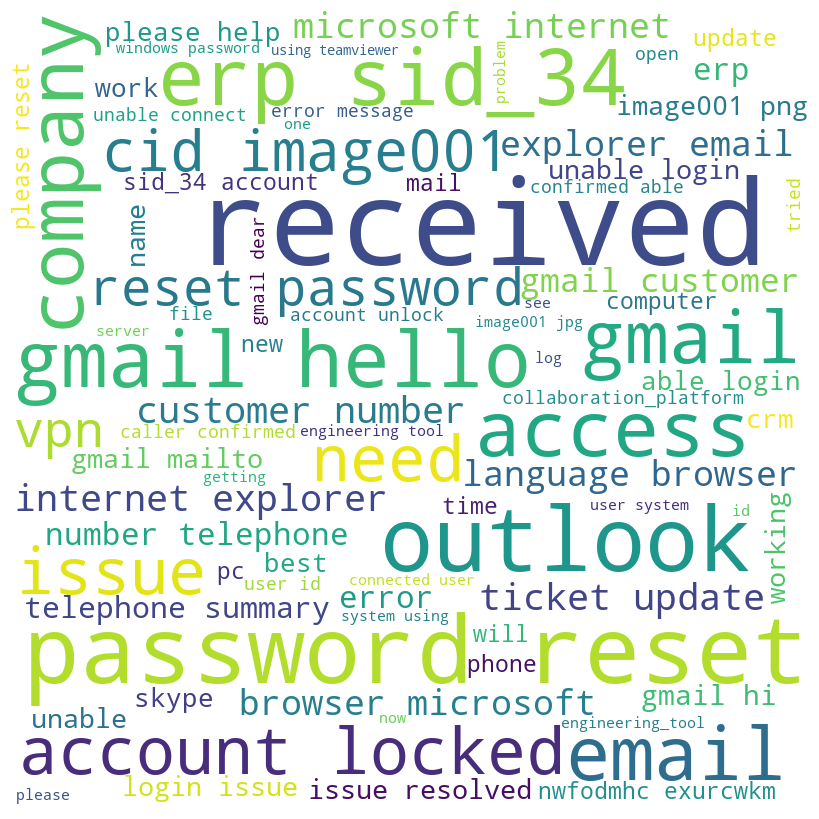

In [ ]:
wordCloudForGroup(incidents_data,"Description","GRP_0")

Value Match GRP_1
WordCloud Chart For: GRP_1


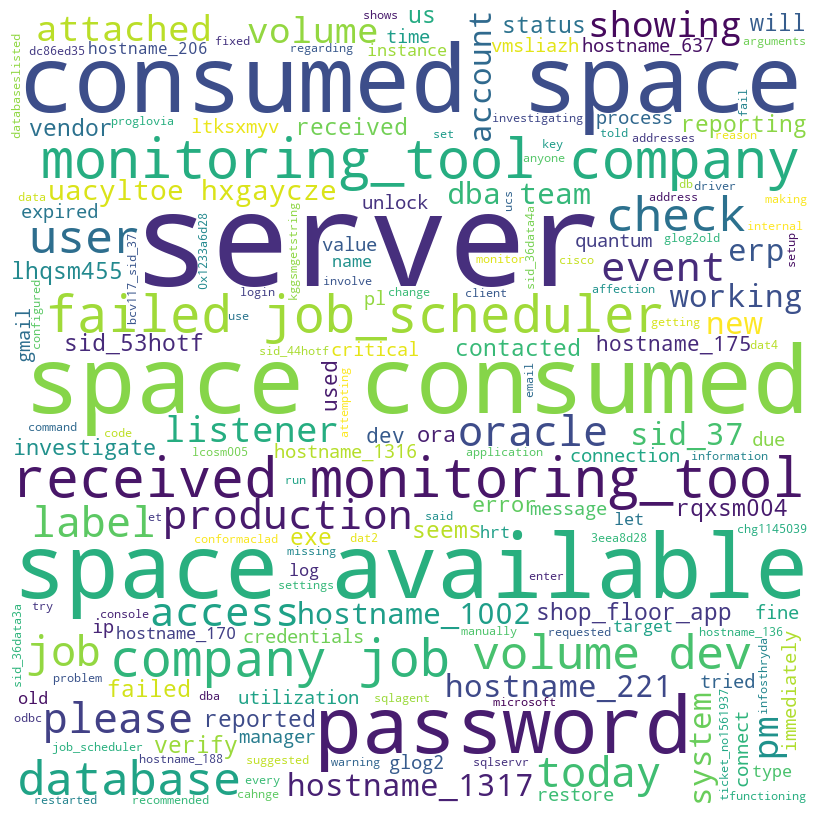

In [ ]:
wordCloudForGroup(incidents_data,"Description","GRP_1")

In [ ]:
incidents_data.groupby('Assignment group').size()

Assignment group
GRP_0     3976
GRP_1       31
GRP_10     140
GRP_11      30
GRP_12     257
          ... 
GRP_71       2
GRP_72       2
GRP_73       1
GRP_8      661
GRP_9      252
Length: 74, dtype: int64

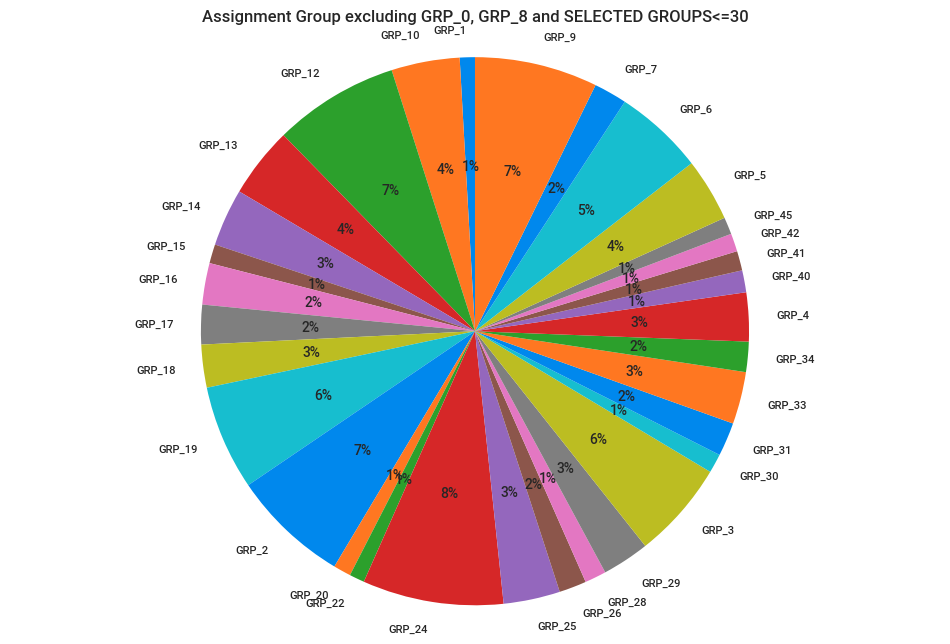

In [ ]:
plt.figure(figsize=(12,8))
plt.pie(ticket_assigned_grp.Count,labels=ticket_assigned_grp['Assignment group'],autopct='%1.0f%%',startangle=90)
plt.title("Assignment Group excluding GRP_0, GRP_8 and SELECTED GROUPS<=30")
plt.axis('equal')
plt.show()


In [ ]:
incidents_data_counts = incidents_data['Assignment group'].value_counts().reset_index()

In [ ]:
incidents_data_counts.head()

,index,Assignment group
0,GRP_0,3976
1,GRP_8,661
2,GRP_24,289
3,GRP_12,257
4,GRP_9,252


We can use above figure to define the ranges to see which groups have tickets in below range. This will help us understand the most important groups to focus on. The ranges can be as below: 
1. 1 ticket
2. 2 tickets
3. 3-8 tickets
4. 9-14 tickets
5. 15-30 tickets
6. 31-50 tickets
7. 51-100 tickets
8. 101-200 tickets
9. 201-300 tickets
10. more than 300 tickets

In [ ]:
ticket_bins = pd.DataFrame(columns=['No. of tickets','No. of Assignment groups'])
_1_ticket = {'No. of tickets':'1 ticket','No. of Assignment groups':len(incidents_data_counts[incidents_data_counts['Assignment group'] == 1])}
_2_tickets = {'No. of tickets':'2 tickets',
              'No. of Assignment groups':len(incidents_data_counts[incidents_data_counts['Assignment group'] == 2 ])}
_3_8_tickets = {'No. of tickets':' 3-8 tickets',
              'No. of Assignment groups':len(incidents_data_counts[(incidents_data_counts['Assignment group'] > 2 )& (incidents_data_counts['Assignment group'] < 9 )])}
_9_14_tickets = {'No. of tickets':' 9-14 tickets',
              'No. of Assignment groups':len(incidents_data_counts[(incidents_data_counts['Assignment group'] > 8)& (incidents_data_counts['Assignment group'] < 15 )])}
_15_30_tickets = {'No. of tickets':' 15-30 ticket',
              'No. of Assignment groups':len(incidents_data_counts[(incidents_data_counts['Assignment group'] > 14)& (incidents_data_counts['Assignment group'] < 31 )])}      
_31_50_tickets = {'No. of tickets':' 31-50 tickets',
              'No. of Assignment groups':len(incidents_data_counts[(incidents_data_counts['Assignment group'] > 30)& (incidents_data_counts['Assignment group'] < 51)])}      
_51_100_tickets = {'No. of tickets':' 51-100 tickets',
              'No. of Assignment groups':len(incidents_data_counts[(incidents_data_counts['Assignment group'] > 50)& (incidents_data_counts['Assignment group'] < 101)])}   
_101_200_tickets = {'No. of tickets':' 101-200 tickets',
              'No. of Assignment groups':len(incidents_data_counts[(incidents_data_counts['Assignment group'] > 100)& (incidents_data_counts['Assignment group'] < 201)])}
_201_300_tickets = {'No. of tickets':' 201-300 tickets',
              'No. of Assignment groups':len(incidents_data_counts[(incidents_data_counts['Assignment group'] > 200)& (incidents_data_counts['Assignment group'] < 301)])}                                                       
_301_tickets = {'No. of tickets':' > 301 tickets',
              'No. of Assignment groups':len(incidents_data_counts[(incidents_data_counts['Assignment group'] > 300)])}
# Append row to the bins
ticket_bins = ticket_bins.append([_1_ticket,_2_tickets,_3_8_tickets,
                          _9_14_tickets,_15_30_tickets,_31_50_tickets,_51_100_tickets,_101_200_tickets,_201_300_tickets,_301_tickets], ignore_index=True)

print(ticket_bins)

     No. of tickets No. of Assignment groups
0          1 ticket                        6
1         2 tickets                        5
2       3-8 tickets                       13
3      9-14 tickets                        4
4      15-30 ticket                       12
5     31-50 tickets                       10
6    51-100 tickets                        9
7   101-200 tickets                        8
8   201-300 tickets                        5
9     > 301 tickets                        2


There are total of 40 Assignment groups which have tickets less than  or equal to 30. Lets see the if we can combine the assignment groups having few tickets and reduce the number of classes for classification. 

For this we shall also check if the same kind of issues are handled by other assignment groups in further analysis with which will be a deciding factor to merge the classes.

Let's see the assignment group distribution for the range of ticksts we see above in the form of pie chart

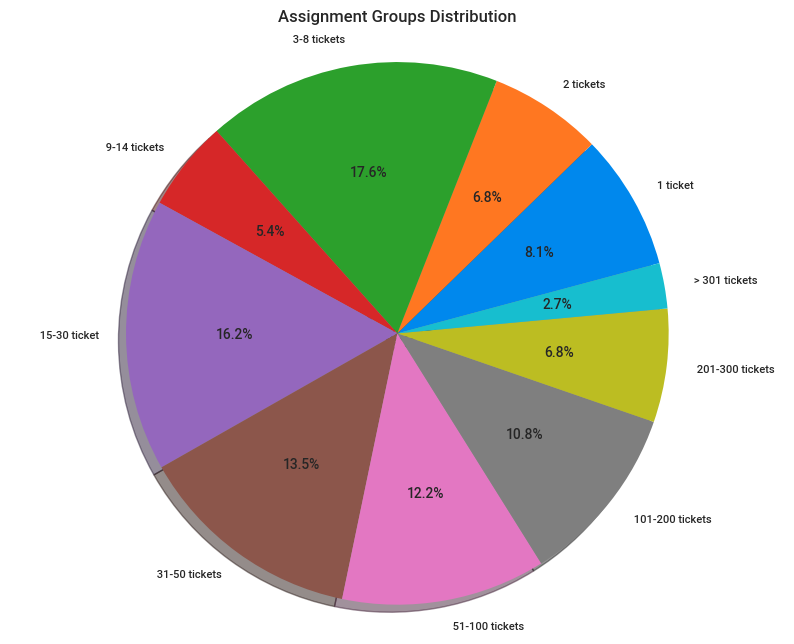

In [ ]:
plt.figure(figsize=(10, 8))
plt.pie(ticket_bins['No. of Assignment groups'],labels=ticket_bins['No. of tickets'],autopct='%1.1f%%', startangle=15, shadow = True);
plt.title('Assignment Groups Distribution')
plt.axis('equal');

In [ ]:
ticket_selected_grp = incidents_data.groupby(['Assignment group']).filter(lambda x: len(x) <=2)
print("No of Assignment groups with less than or equal to 2 tickets", ticket_selected_grp['Assignment group'].nunique())


No of Assignment groups with less than or equal to 2 tickets 11


In [ ]:
assignment_group_ticket_counts = incidents_data_counts[incidents_data_counts['index'].isin(ticket_selected_grp['Assignment group'])]

In [ ]:
assignment_group_ticket_counts

,index,Assignment group
63,GRP_54,2
64,GRP_72,2
65,GRP_69,2
66,GRP_71,2
67,GRP_57,2
68,GRP_73,1
69,GRP_35,1
70,GRP_64,1
71,GRP_67,1
72,GRP_61,1


## 3.2 DATA PREPROCESSING 

## 3.3 FEATURE ENGINEERING

In [ ]:
pip install google_trans_new

## 3.4 CHARACTERS TRANSLATION

In [ ]:
dataframeIndexName = incidents_data[incidents_data['Short description'].str.count(r'^[åç‘æäÄ].*')>0]

In [ ]:
dataframeIndexName.head(55)

In [ ]:
pip install translate-api

In [ ]:
pip install ftfy

In [ ]:
pip install googletrans

In [ ]:
!pip install google_trans_new

In [ ]:
incidents_data.columns

In [ ]:
incidents_data = incidents_data.sort_values(by='Assignment group',axis=0,ascending=True,inplace=False)
incidents_data["IncidentDescriptionText"] = (incidents_data["Short description"] + incidents_data["Description"]).astype("str")
# incidents_data = incidents_data[["Short description","Description"]]

incidents_data.head(50)


,Short description,Description,Caller,Assignment group,IncidentDescriptionText,Translated_text_final
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,login issue-verified user details.(employee# &...,login issue -verified user details.(employee# ...
6526,account locked out ; password expired,account locked out ; password expired,aguxobqs upgtdafh,GRP_0,account locked out ; password expiredaccount l...,insufficient permissions on web crm insufficie...
6519,"received call , hold music was playing on othe...","received call , hold music was playing on othe...",efbwiadp dicafxhv,GRP_0,"received call , hold music was playing on othe...",company distributor_tool is messed up. i enter...
6516,outlook is prompting for passwords again & again,outlook is prompting for passwords again & again,pkzthgea kgvsdmpj,GRP_0,outlook is prompting for passwords again & aga...,ms crm dynamics : outlook issue \nsummary:i ne...
6515,engineering tool loin,engineering tool loin,jzksvdtb czvlsmqx,GRP_0,engineering tool loinengineering tool loin,a solution is needed to find a permanent fix t...
6514,"engineering_tool, business_client, vpn and eng...","engineering_tool, business_client, vpn and eng...",jvpkulxw ovuweygj,GRP_0,"engineering_tool, business_client, vpn and eng...",reset the password for constance m wgtyillsfor...
6513,account lock out ; ad,account lock out ; ad,hzetqwba tmsbnfkh,GRP_0,account lock out ; adaccount lock out ; ad,euromote entry error \n\nreceived from: brhlcp...
6510,ticket update on ticket_no1544198 from wqfzjy...,ticket update on ticket_no1544198 from wqfzjy...,efbwiadp dicafxhv,GRP_0,ticket update on ticket_no1544198 from wqfzjy...,urgent \n\nreceived from: uezonywf.rldbvipu@gm...
6508,error log on vpn server,\r\n\r\nreceived from: nbdljruw.axcrspyh@gmail...,nbdljruw axcrspyh,GRP_0,error log on vpn server\r\n\r\nreceived from: ...,ticket update on inplant_865534 ticket update ...
6504,not able to open powerpoint,\r\n\r\nreceived from: tpflxnhz.bdjiosrp@gmail...,tpflxnhz bdjiosrp,GRP_0,not able to open powerpoint\r\n\r\nreceived fr...,vip 1 // finance_vip1 is unable to approve an ...


In [ ]:
incidents_data.head(50)

In [ ]:
# # from googletrans import Translator
# import translators as ts
# import ftfy
# # from google_trans_new import google_translator
# import pickle

# def translate_to_english(dataframe,description_column,language):
#     english_text = []
#     tokenCount = 0
#     with open('/content/drive/MyDrive/AIML/projects/CAPSTONE_PROJECT/translatedIncidentText.pickle', 'wb') as f:
#       for column in dataframe[[description_column]]:
#           # Select column contents by column name using [] operator
#           print("Column",column)
#           Text = dataframe[column]
#           print('Text : ', len(Text)) # column length

#           # translator = google_translator() 
#           # translator = Translator()
#           for i in range(len(Text)) : #total row count 
#                   # langs = translator.detect(Text)
#                   # # print(langs[0])
#                   # if langs[0] == 'en':
#                   #     english_text.append(Text.values[i])
#                   #     pickle.dump(english_text, f) 
#                   # else:
#                   textFitFt = ftfy.fix_text(Text.values[i])
#                       # print('Converted',textFitFt)
#                       # translated = translator.translate(text=textFix, lang_tgt=language)
#                   translated = ts.alibaba(textFitFt, professional_field='general')
#                       # print('translated',translated)
#                   english_text.append(translated)
#                   pickle.dump(english_text, f) 
#           return english_text
      

In [ ]:
# translated_to_english = translate_to_english(incidents_data,'IncidentDescriptionText','en')

In [ ]:
# # import io
# with open('/content/drive/MyDrive/AIML/projects/CAPSTONE_PROJECT/translatedIncidentText.pickle', 'rb') as file:
#     #  pickleBuffer = io.BytesIO()
#      myvar = pickle.loads(file)
  
# print(myvar)

In [ ]:
# translated_to_english 

In [ ]:
# import pickle
# with open('/content/drive/MyDrive/AIML/projects/CAPSTONE_PROJECT/mypickle.pickle', 'wb') as f:
#       pickle.dump(translated_to_english, f) 

In [ ]:
pip install googletrans

In [7]:
import pickle
with open('/content/drive/MyDrive/AIML/projects/CAPSTONE_PROJECT/Final_English_Texts.pkl', 'rb') as f:
  final_translated_texts = pickle.load(f)

incidents_data['Translated_text_final'] = final_translated_texts

In [ ]:
incidents_data.head()


In [ ]:
incidents_data.isnull().any()

#PREPROCESSING DATASET TEXT  

As part of text cleaning, It needs to remove numbers,special sign , white spaces etc.

We are using built-in python library which helps to remove number, white spaces,special sign, email,url & punctuation, stops words etc.

In [ ]:
pip install text-preprocessing


3.2.1 DATA CLEANING

3.2.2 REMOVAL OF STOPWORDS

In [ ]:
incidents_data.head()

,Short description,Description,Caller,Assignment group,Translated_text_final
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,login issue -verified user details.(employee# ...
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0,outlook \n\nreceived from: hmjdrvpb.komuaywn@g...
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0,cant log in to vpn \n\nreceived from: eylqgodm...
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page unable to access...
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error skype error


In [8]:

## Removal of Stop Words
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stop = stopwords.words('english')
incidents_data['cleaned_description'] = incidents_data['Translated_text_final'].apply(lambda x: " ".join(x for x in str(x).split() if x not in stop))
incidents_data['cleaned_description'].head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


0    login issue -verified user details.(employee# ...
1    outlook received from: hmjdrvpb.komuaywn@gmail...
2    cant log vpn received from: eylqgodm.ybqkwiam@...
3    unable access hr_tool page unable access hr_to...
4                              skype error skype error
Name: cleaned_description, dtype: object


3.2.3 LEMMATIZATION

In [9]:

## Lemmatization
import nltk
nltk.download('wordnet')

from textblob import Word
incidents_data['cleaned_description']= incidents_data['cleaned_description'].apply(lambda x: " ".join([Word(word).lemmatize() for word in str(x).split()]))
incidents_data['cleaned_description'].head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


0    login issue -verified user details.(employee# ...
1    outlook received from: hmjdrvpb.komuaywn@gmail...
2    cant log vpn received from: eylqgodm.ybqkwiam@...
3    unable access hr_tool page unable access hr_to...
4                              skype error skype error
Name: cleaned_description, dtype: object

In [10]:
incidents_data.head()

,Short description,Description,Caller,Assignment group,Translated_text_final,cleaned_description
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,login issue -verified user details.(employee# ...,login issue -verified user details.(employee# ...
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0,outlook \n\nreceived from: hmjdrvpb.komuaywn@g...,outlook received from: hmjdrvpb.komuaywn@gmail...
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0,cant log in to vpn \n\nreceived from: eylqgodm...,cant log vpn received from: eylqgodm.ybqkwiam@...
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page unable to access...,unable access hr_tool page unable access hr_to...
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error skype error,skype error skype error


3.2.4 TOKENIZATION

In [11]:
import nltk
# Tokenizing the training and the test set
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
incidents_data['token_desc'] = incidents_data['cleaned_description'].apply(lambda x: tokenizer.tokenize(x))

In [12]:
incidents_data['token_desc'].head()

0    [login, issue, verified, user, details, employ...
1    [outlook, received, from, hmjdrvpb, komuaywn, ...
2    [cant, log, vpn, received, from, eylqgodm, ybq...
3    [unable, access, hr_tool, page, unable, access...
4                         [skype, error, skype, error]
Name: token_desc, dtype: object


3.3 PREPARE FINAL TEXT AFTER DATA PREPROCESSING

In [13]:
# After preprocessing, the text format
def combine_text(tokenized_text):
    '''Takes a list of text and combines them into one large chunk of text.'''
    final_text = ' '.join(tokenized_text)
    return final_text

incidents_data['token_description'] = incidents_data['token_desc'].apply(lambda x : combine_text(x))

In [14]:
incidents_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Short description      8492 non-null   object
 1   Description            8499 non-null   object
 2   Caller                 8500 non-null   object
 3   Assignment group       8500 non-null   object
 4   Translated_text_final  8500 non-null   object
 5   cleaned_description    8500 non-null   object
 6   token_desc             8500 non-null   object
 7   token_description      8500 non-null   object
dtypes: object(8)
memory usage: 531.4+ KB


In [15]:
incidents_data.to_csv("/content/drive/MyDrive/AIML/projects/CAPSTONE_PROJECT/final_cleaned_data.csv")

In [16]:
incidents_data_final = pd.read_csv('/content/drive/MyDrive/AIML/projects/CAPSTONE_PROJECT/final_cleaned_data.csv',encoding='utf-8')
incidents_data_final.head()

,Unnamed: 0,Short description,Description,Caller,Assignment group,Translated_text_final,cleaned_description,token_desc,token_description
0,0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,login issue -verified user details.(employee# ...,login issue -verified user details.(employee# ...,"['login', 'issue', 'verified', 'user', 'detail...",login issue verified user details employee man...
1,1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0,outlook \n\nreceived from: hmjdrvpb.komuaywn@g...,outlook received from: hmjdrvpb.komuaywn@gmail...,"['outlook', 'received', 'from', 'hmjdrvpb', 'k...",outlook received from hmjdrvpb komuaywn gmail ...
2,2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0,cant log in to vpn \n\nreceived from: eylqgodm...,cant log vpn received from: eylqgodm.ybqkwiam@...,"['cant', 'log', 'vpn', 'received', 'from', 'ey...",cant log vpn received from eylqgodm ybqkwiam g...
3,3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page unable to access...,unable access hr_tool page unable access hr_to...,"['unable', 'access', 'hr_tool', 'page', 'unabl...",unable access hr_tool page unable access hr_to...
4,4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error skype error,skype error skype error,"['skype', 'error', 'skype', 'error']",skype error skype error


**Overview of Decision tree classifier**

It is a popular supervised algoritham technique of classification and prediction. It can be use for regression and classification. It is a flowchart like tree structure. It has terminology like **internal node**, **branch** and **leaf node**. Internal node represents attributes Or features of dataset. Branches are the descision rules and leaf node also called terminal node holds the class label which represents the outcome.

**Root node** is from where the decision tree starts. It represents the entire dataset, which further gets divided into two or more homogeneous sets.

**Splitting** is the process of dividing the decision node/root node into sub-nodes according to the given conditions.

**Pruning** is the process of removing the unwanted branches from the tree.

In a Decision tree, there are two nodes, which are the **Decision Node** and **Leaf Node**. Decision nodes are used to make any decision and have multiple branches, whereas Leaf nodes are the output of those decisions and do not contain any further branches.

In order to build a tree, we use the CART algorithm, which stands for Classification and Regression Tree algorithm.

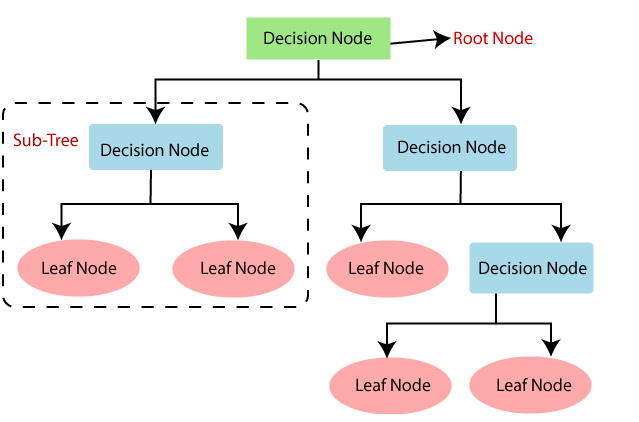

## Prepare new dataset

In [ ]:
incidents_data_final.columns

Index(['Unnamed: 0', 'Short description', 'Description', 'Caller',
       'Assignment group', 'Translated_text_final', 'cleaned_description',
       'token_desc', 'token_description'],
      dtype='object')

In [ ]:
NewIncidentData=pd.DataFrame()
NewIncidentData = pd.DataFrame(incidents_data_final,columns=['Caller','token_description','Assignment group'])

In [ ]:
NewIncidentData.head()

,Caller,token_description,Assignment group
0,spxjnwir pjlcoqds,login issue verified user details employee man...,GRP_0
1,hmjdrvpb komuaywn,outlook received from hmjdrvpb komuaywn gmail ...,GRP_0
2,eylqgodm ybqkwiam,cant log vpn received from eylqgodm ybqkwiam g...,GRP_0
3,xbkucsvz gcpydteq,unable access hr_tool page unable access hr_to...,GRP_0
4,owlgqjme qhcozdfx,skype error skype error,GRP_0


# Declare Features variable and traget variable

In [ ]:
X = NewIncidentData.drop(['Assignment group'], axis=1)
y = NewIncidentData['Assignment group']

# Split data into separate training and test set

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [ ]:
X_train.shape, X_test.shape

((5950, 2), (2550, 2))

In [ ]:
X_train.dtypes

Caller               object
token_description    object
dtype: object

Encode categorical variables

In [ ]:
X_train.head()

,Caller,token_description
2157,ferxqvsm esmwxqlf,cannot access workflow collaboration_platform ...
6048,lzcvymbn lqnaykvo,Login account mp_ek pc empw8111328a 12 13 set ...
3342,bpctwhsn kzqsbmtp,job Job_1141 failed job_scheduler at 09 24 201...
3500,tfrpybxj qodbpvwj,outlook asking reactivate outlook asking react...
8433,atlwdyej vtlhzbix,telephony_software status update telephony_sof...


In [ ]:
!pip install category_encoders

In [ ]:
# import category encoders
# Transform categorical data into dummies

import category_encoders as ce

In [ ]:
encoder = ce.OrdinalEncoder(cols=['Caller','token_description'])

In [ ]:
X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [ ]:
X_train.head(20)

,Caller,token_description
2157,1,1
6048,2,2
3342,3,3
3500,4,4
8433,5,5
5,6,6
1819,7,7
8472,8,8
4615,9,9
6822,10,10


In [ ]:
X_test.head()

,Caller,token_description
3013,-1.0,-1.0
2717,1453.0,-1.0
1534,1107.0,1363.0
5386,861.0,-1.0
2353,-1.0,-1.0


Decision Tree Classifier with criterion gini index

In [ ]:
# import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

The **gini** impurity measures the frequency at which any element of the dataset will be mislabelled when it is randomly labeled.

**Entropy** is a measure of information that indicates the disorder of the features with the target. Similar to the Gini Index, the optimum split is chosen by the feature with less entropy.

In [ ]:
# instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=1)

# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [ ]:
# instantiate the DecisionTreeClassifier model with criterion entropy
clf_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=1)

# fit the model
clf_entropy.fit(X_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

Predict the Test set results with criterion gini index

In [ ]:
y_pred_gini = clf.predict(X_test)
y_pred_entropy = clf.predict(X_test)

Check accuracy score with criterion gini index

In [ ]:
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))
print('Model accuracy score with criterion Entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_entropy)))

Model accuracy score with criterion gini index: 0.3165
Model accuracy score with criterion Entropy: 0.3165


Scoring the decision tree

In [ ]:
#Store the accuracy results for each model in a dataframe for final comparison
clf_result=pd.DataFrame()
tmpCLFResult = pd.DataFrame({'Model':['Desicion Tree'], 'accuracy': [accuracy_score(y_test, y_pred_gini)]},index={'1'})
clf_result = pd.concat([clf_result, tmpCLFResult])
clf_result

,Model,accuracy
1,Desicion Tree,0.316471


Visualize decision-trees

[Text(465.0, 528.5, 'X[0] <= 7.5\ngini = 0.765\nsamples = 5950\nvalue = [2803, 21, 101, 17, 162, 109, 90, 29, 54, 60, 63\n158, 162, 31, 21, 19, 17, 201, 84, 44, 14, 30\n62, 137, 19, 46, 3, 72, 41, 1, 12, 11, 2, 14\n74, 29, 32, 28, 3, 10, 20, 4, 24, 15, 4, 97, 5\n4, 5, 11, 2, 7, 2, 1, 2, 3, 119, 15, 1, 18\n2, 1, 10, 3, 1, 1, 2, 57, 1, 1, 2, 445, 179]'),
 Text(232.5, 377.5, 'X[0] <= 2.5\ngini = 0.766\nsamples = 602\nvalue = [10, 5, 45, 1, 8, 4, 3, 2, 2, 0, 3, 2, 0, 0\n0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1\n0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 3, 0\n3, 0, 0, 73, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0\n56, 12, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0\n0, 248, 112]'),
 Text(116.25, 226.5, 'X[1] <= 1.5\ngini = 0.571\nsamples = 7\nvalue = [4, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0]'),
 Text(58.125, 75.5, 'gini = 0.0\nsamples = 1\nval

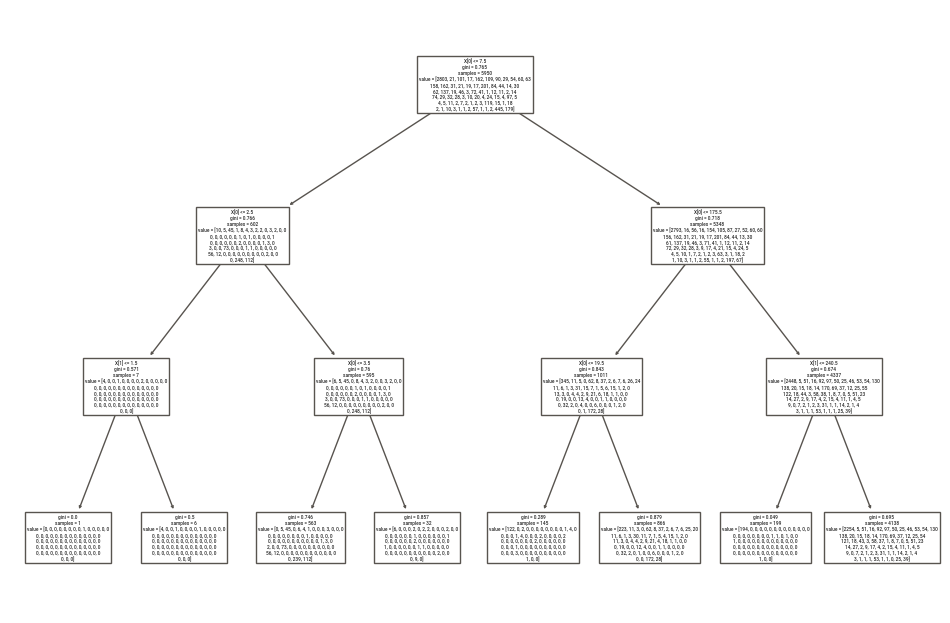

In [ ]:
plt.figure(figsize=(12,8))
tree.plot_tree(clf_gini.fit(X_train, y_train)) 

***Observetions:***
1. Used both splitting criteria entropy and gini for splitting the nodes of a decision tree seems underfitting

RECURRENT NEURAL NETWORK (RNN)

1. Prepared Dataset

In [17]:
NewIncidentData=pd.DataFrame()
NewIncidentData = pd.DataFrame(incidents_data_final,columns=['token_description','Assignment group'])

In [18]:
NewIncidentData.head()

,token_description,Assignment group
0,login issue verified user details employee man...,GRP_0
1,outlook received from hmjdrvpb komuaywn gmail ...,GRP_0
2,cant log vpn received from eylqgodm ybqkwiam g...,GRP_0
3,unable access hr_tool page unable access hr_to...,GRP_0
4,skype error skype error,GRP_0


In [19]:
len(NewIncidentData.token_description[2])
NewIncidentData.token_description[2]

'cant log vpn received from eylqgodm ybqkwiam gmail com hi cannot log vpn best'

In [20]:
NewIncidentData.isna().sum()

token_description    1
Assignment group     0
dtype: int64

In [21]:
NewIncidentData = NewIncidentData.dropna()

Counting unique words in corpus

In [25]:
from collections import Counter

In [22]:
def word_counter(text):
  count = Counter()
  for n in text.values:
    for word in n.split():
      count[word] += 1
  return count

In [23]:
newDf = pd.DataFrame()

In [26]:
text = word_counter(NewIncidentData['token_description'])
print("Word Counts==>",text)

Word Counts==> Counter({'com': 3802, 'company': 2730, 'from': 2511, 'received': 2333, '2016': 2270, 'please': 2268, '00': 2258, 'password': 2238, 'gmail': 2205, 'job': 2017, 'job_scheduler': 1928, 'no': 1925, 'erp': 1922, 'yes': 1792, 'failed': 1744, 'user': 1663, 'na': 1639, 'at': 1622, '10': 1591, 'reset': 1539, 'unable': 1497, 'issue': 1482, 'access': 1465, 'account': 1307, '1': 1138, 'error': 1104, '09': 1065, 'email': 1040, 'ticket': 1032, 'monitoring_tool': 987, '08': 976, 'need': 952, 'outlook': 935, 'working': 873, 'login': 851, 'system': 826, 'help': 825, 'site': 822, '2': 771, 'name': 744, 'SID_34': 709, 'id': 686, '16': 671, 'locked': 649, 'message': 646, 'hello': 637, '4': 625, 'update': 592, 'server': 576, 'network': 564, '23': 564, 'circuit': 560, 'printer': 554, 'power': 554, 'new': 547, 'problem': 533, 'window': 531, 'event': 528, 'phone': 525, 'vpn': 524, '0': 519, 's': 516, 'backup': 507, 'able': 506, 'usa': 506, '11': 504, 'log': 493, 'see': 492, 'crm': 485, 'cannot'

In [27]:
num_words=len(text)

In [28]:
# Max number of words in a sequence
max_number = 100

Assigning target column and featurs 

Train test split

In [29]:
trainSize = int(NewIncidentData.shape[0]*0.8)
trainSentences = NewIncidentData.token_description[:trainSize]
trainLabels = NewIncidentData['Assignment group'][:trainSize]

testSentences = NewIncidentData.token_description[trainSize:]
testLabels = NewIncidentData['Assignment group'][trainSize:]

In [30]:
testLabels.shape

(1700,)

In [31]:
len(testSentences)

1700

In [32]:
testSentences

6800    unable open order confirmation erp received fr...
6801    erp SID_34 account locked erp SID_34 account l...
6802    system disk server HostName_698 full received ...
6803    Personal drive adelhmk longer available server...
6804    job Job_3028 failed job_scheduler at 08 22 201...
                              ...                        
8495    email coming zz mail received from avglmrts vh...
8496    telephony_software issue telephony_software issue
8497    vip2 window password reset tifpdchb pedxruyf v...
8498    machine não está funcionando unable access mac...
8499    At several pc s different prgramdntyme open At...
Name: token_description, Length: 1700, dtype: object

In [33]:
len(testSentences)

1700

Tokenizing training set

In [34]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words = num_words)
tokenizer.fit_on_texts(trainSentences)

In [35]:
word_index = tokenizer.word_index

In [36]:
word_index

{'job': 1,
 'com': 2,
 'tool': 3,
 'company': 4,
 'password': 5,
 '00': 6,
 'from': 7,
 'no': 8,
 '2016': 9,
 'received': 10,
 'please': 11,
 'gmail': 12,
 'na': 13,
 'yes': 14,
 'erp': 15,
 'failed': 16,
 'scheduler': 17,
 'at': 18,
 '10': 19,
 'user': 20,
 'reset': 21,
 'sid': 22,
 'unable': 23,
 'issue': 24,
 '1': 25,
 'access': 26,
 'account': 27,
 '09': 28,
 'ticket': 29,
 'error': 30,
 'email': 31,
 'need': 32,
 'monitoring': 33,
 'outlook': 34,
 'working': 35,
 '2': 36,
 'site': 37,
 'system': 38,
 'login': 39,
 'help': 40,
 'hostname': 41,
 '34': 42,
 'hello': 43,
 'circuit': 44,
 'power': 45,
 'network': 46,
 '08': 47,
 'name': 48,
 'printer': 49,
 'message': 50,
 'locked': 51,
 'vendor': 52,
 'update': 53,
 'vpn': 54,
 'id': 55,
 '23': 56,
 'problem': 57,
 'backup': 58,
 'engineering': 59,
 'skype': 60,
 'new': 61,
 'usa': 62,
 'telecom': 63,
 'server': 64,
 'able': 65,
 's': 66,
 'phone': 67,
 '11': 68,
 'cid': 69,
 'outage': 70,
 'crm': 71,
 'cannot': 72,
 'window': 73,
 '4

In [37]:
train_sequences = tokenizer.texts_to_sequences(trainSentences)
test_sequences = tokenizer.texts_to_sequences(testSentences)

In [40]:
from keras.preprocessing.sequence import pad_sequences
train_padded = pad_sequences(train_sequences,maxlen = max_number, padding='post', truncating = 'post' )

In [41]:
train_padded

array([[  39,   24,  217, ...,    0,    0,    0],
       [  34,   10,    7, ...,    0,    0,    0],
       [ 989,   75,   54, ...,    0,    0,    0],
       ...,
       [ 917,  411,   34, ...,    0,    0,    0],
       [  49,  120, 1985, ...,    0,    0,    0],
       [ 681, 2547, 7189, ...,    0,    0,    0]], dtype=int32)

In [42]:
test_padded = pad_sequences(test_sequences,maxlen = max_number, padding='post', truncating = 'post' )

In [43]:
test_padded[0]

array([  23,   76,   89,  681,   15,   10,    7,   12,    2,   11,  329,
       4891,  468,  164,   23,   76, 1030,   69,  130,  190,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0], dtype=int32)

In [44]:
print(trainSentences[0])
print(train_sequences[0])

login issue verified user details employee manager name checked user name ad reset password advised user login check caller confirmed able login issue resolved
[39, 24, 217, 20, 462, 209, 103, 48, 388, 20, 48, 246, 21, 5, 631, 20, 39, 96, 381, 310, 65, 39, 24, 296]


In [45]:
train_sequences[0]

[39,
 24,
 217,
 20,
 462,
 209,
 103,
 48,
 388,
 20,
 48,
 246,
 21,
 5,
 631,
 20,
 39,
 96,
 381,
 310,
 65,
 39,
 24,
 296]

Check inverse

In [46]:
reverseWordIndex = dict([(value,key) for (key,value) in word_index.items()])

In [47]:
reverseWordIndex

{1: 'job',
 2: 'com',
 3: 'tool',
 4: 'company',
 5: 'password',
 6: '00',
 7: 'from',
 8: 'no',
 9: '2016',
 10: 'received',
 11: 'please',
 12: 'gmail',
 13: 'na',
 14: 'yes',
 15: 'erp',
 16: 'failed',
 17: 'scheduler',
 18: 'at',
 19: '10',
 20: 'user',
 21: 'reset',
 22: 'sid',
 23: 'unable',
 24: 'issue',
 25: '1',
 26: 'access',
 27: 'account',
 28: '09',
 29: 'ticket',
 30: 'error',
 31: 'email',
 32: 'need',
 33: 'monitoring',
 34: 'outlook',
 35: 'working',
 36: '2',
 37: 'site',
 38: 'system',
 39: 'login',
 40: 'help',
 41: 'hostname',
 42: '34',
 43: 'hello',
 44: 'circuit',
 45: 'power',
 46: 'network',
 47: '08',
 48: 'name',
 49: 'printer',
 50: 'message',
 51: 'locked',
 52: 'vendor',
 53: 'update',
 54: 'vpn',
 55: 'id',
 56: '23',
 57: 'problem',
 58: 'backup',
 59: 'engineering',
 60: 'skype',
 61: 'new',
 62: 'usa',
 63: 'telecom',
 64: 'server',
 65: 'able',
 66: 's',
 67: 'phone',
 68: '11',
 69: 'cid',
 70: 'outage',
 71: 'crm',
 72: 'cannot',
 73: 'window',
 74

In [48]:
def decode(text):
  return " ".join([reverseWordIndex.get(i,"?") for i in text])

In [49]:
decode(train_sequences[5])
# trainSentences[5]

'unable log engineering tool skype unable log engineering tool skype'

In [50]:
print("Shape of train",train_padded.shape)
print("Shape of test",test_padded.shape)

Shape of train (6799, 100)
Shape of test (1700, 100)


In [51]:
from keras.models import Sequential
from keras.layers import Embedding,LSTM,Dense,Dropout
from keras.initializers import constant
from keras.optimizers import Adam

In [52]:
model = Sequential()

In [53]:
model.add(Embedding(num_words,32,input_length=max_number))
model.add(LSTM(64,dropout=0.1))
model.add(Dense(1,activation='sigmoid'))

optimizers = Adam(learning_rate=3e-4)
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=["accuracy"])

In [54]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 32)           712416    
_________________________________________________________________
lstm (LSTM)                  (None, 64)                24832     
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 737,313
Trainable params: 737,313
Non-trainable params: 0
_________________________________________________________________


In [55]:
history = model.fit(train_padded,trainLabels, epochs=20, validation_data=(test_padded,testLabels))

Epoch 1/20


UnimplementedError: ignored